In [109]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [110]:
#create a matrix of size L*L
def create(L) :
    return [[x_0,x_1] for x_0 in range(2*L) for x_1 in range(2*L)]

In [111]:
#array of all distances between a center and the other points of the matrix
def distance(x_0,matrix,L):
    x = [sites[0] for sites in matrix]
    y = [sites[1] for sites in matrix]
    delta_x = [abs(x_0[0]-i) for i in x]
    delta_y = [abs(x_0[1]-j) for j in y]
    arr_dist = [(delta_x[i]**2 + delta_y[i]**2)**(1/2) for i in range(len(delta_x))]
    return arr_dist

In [112]:
# List of radii
def radii(L, steps):
    radius = np.linspace(0.01,L/2,num=steps)
    return radius

In [113]:
# choose a center randomly in the original matrix
def x_0(L):                                                                               #take a random point from the initial matrix
    x = random.uniform(int(L/2),int(3*L/2))
    y = random.uniform(int(L/2),int(3*L/2))
    center = [x,y]
    return center

In [140]:
def count(x_0,mat,radius): #count how many points are at a distance <= r from x
    L = len(mat)
    dist = distance(x_0,mat,L)
    dist.sort()
    d = np.array(dist)
    counts = []
    for R in radius:
        count_R = np.count_nonzero(d <= R)
        counts.append(count_R)
    #print(counts)
    return counts

def vec_x0(L,n):
    v = [x_0(L) for i in range(n)]
    return v

def arr_counts(L,n,radius,mat):
    v = vec_x0(L,n)
    arr = [count(x0,mat,radius) for x0 in v]
    return arr

In [184]:
def variance(L,n,radius,mat):
    arr = arr_counts(L,n,radius,mat)
    m = np.array(arr)
    arr_var = []
    for i in range(len(radius)):
        mom = np.power(m[:,i],2)
        var = (np.average(mom)-np.power(np.average(m[:,i]),2))/radius[i]**2
        arr_var.append(var)
    return arr_var

In [185]:
def rescaled_var(L,steps,n,mat):
    R = radii(L,steps)
    arr_var = [(variance(L,n,r,mat)/pow(r,2)) for r in R]
    return arr_var

In [193]:
L = 50
a = create(L)
radius = radii(L,200)
#x = np.array(arr_counts(L,1000,radius,a))
x[:,199]
y = variance(L,1000,radius,a)

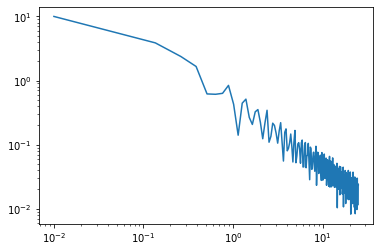

In [194]:
plt.plot(radii(L,200),y)
plt.xscale('log')
plt.yscale('log')

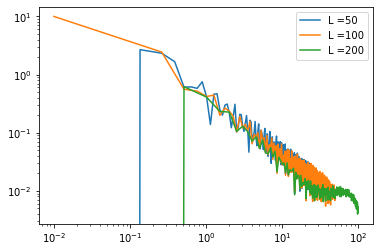

In [202]:
size = [50,100,200]
arrays_var = []
for i in range(len(size)):
    a = create(size[i])
    radius = radii(size[i],200)
    arrays_var.append(variance(size[i],1000,radius,a))
    plt.plot(radius, arrays_var[i], label = 'L =' + str(size[i]))
    plt.xscale('log')
    plt.yscale('log')
plt.legend()
plt.show()